<a href="https://colab.research.google.com/github/phuongnam2002/AI-Machine-Learning/blob/main/SiameseNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Siamesse Network

SNN chỉ sử dụng một số lượng hình ảnh rất nhỏ (vài ảnh) để có được những dự đoán tốt. 

SNN chứa 2 hoặc nhiều mạng con giống hệt nhau về cấu hình, thông số và trọng số. Việc cập nhật sẽ cập nhật đồng thời cả trên 2 mạng con. SNN dùng để tìm điểm giống nhau của Input data bằng cách so sánh các vector đặc trưng của chúng. SNN cho phép phân loại các lớp dữ liệu mới mà không cần train lại model. 

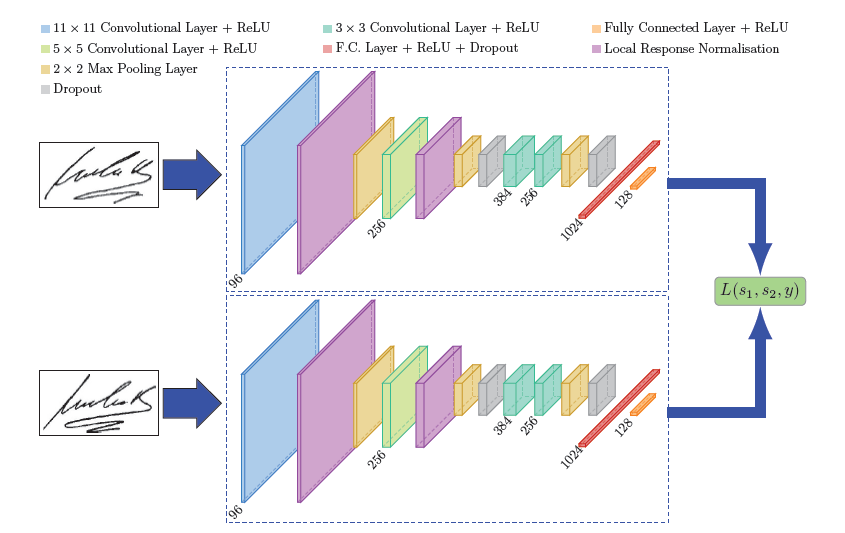

Các bước của Siamese Network:

1. Chọn một cặp Input Data
2. Đưa mỗi ảnh qua mỗi Sub-network của SNN để xử lý. Output của các Sub-networks là một Embedding vector.
3. Tính toán khoảng cách Euclidean giữa 2 Embedding vectors đó.
4. Áp dụng Sigmoid đưa ra score thuộc [0, 1] thể hiện mức độ giống nhau giữa 2 Embedding vectors. Score càng gần 1 thì 2 vector càng giống nhau và ngược lại.

*Ưu điểm*

1. Lượng dữ liệu cần để train SNN là rất ít, chỉ cần 1-5 samples là đủ. SNN sử dụng One-shot hoặc Few-Shot. 
2. Khả năng kết hợp với các bộ phân loại khác cao.
3. SNN tập trung vào việc học các Features ở các lớp sâu hơn, nơi mà các Features giống nhau được đặt gần nhau nên nó có thể biết được 2 ảnh giống nhau thì tương đồng nhau ở những điểm gì.

*Nhược điểm*

1. Thời gian huấn luyện lâu hơn. SNN học theo từng cặp đôi một với nhau nên khả năng học của nó chậm hơn các NN khác.
2. Không thể hiện xác suất mỗi lớp trong Output. SNN chỉ đưa đưa 1 giá trị Score trong đoạn [0,1], thể hiện sự giống nhau giữa 2 Input Data. Score càng gần 1 thì 2 Input Data càng giống nhau và ngược lại.

## Triple Loss

Sử dụng bộ 3 Input Data là Anchor(A), Positive(P) và Nagative(N), d(A,P) sẽ được minimize còn d(A,N) sẽ được maximize. 

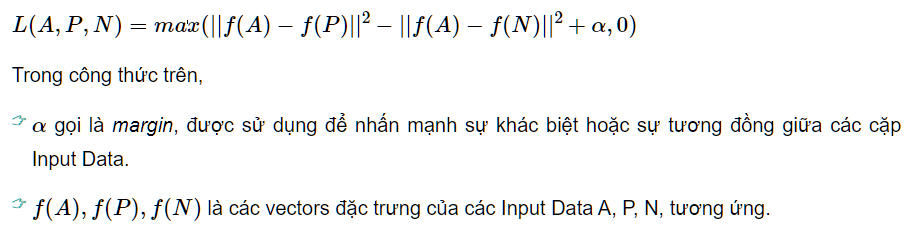


## Contrastive Loss

Chỉ dùng 1 cặp input data. Nếu cùng loại thì khoảng cách giữa các vectors đặc trưng sẽ được minimize còn khác loại thì sẽ optimize.

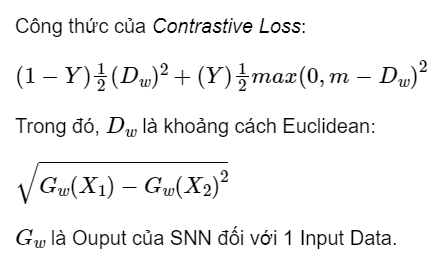